# Importing File and Checking

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('Card_Details_Corrected.xlsx')
df2 = pd.read_excel('Customer_Details_Corrected.xlsx')

In [3]:
df1.head()

,CustomerID,Income,Limit,Rating,Cards,Balance
0,0002-ORFBO,105.038,9142,734,3,232
1,0002-ORFBOA,69.820,4223,389,1,924
2,0002-ORFBOC,17.441,2430,253,1,20
3,0002-ORFBOCH,39.368,3829,248,3,813
4,0002-ORFBOH,56.375,2850,258,1,109


In [4]:
df2.head()

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor
2,Priscilla Ian,0002-ORFBOC,46,Separated,Male,African American,Senior Secondary
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate


# Merging Two Datasets for better analysis

In [10]:
merged_df = pd.merge(df2, df1, on='CustomerID', how='inner')

In [11]:
merged_df_head = merged_df.head()

In [13]:
merged_df_head

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Separated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109


# Performing Descriptive Statistics

In [14]:
# Descriptive statistics for numerical variables
numerical_stats = merged_df.describe()

In [15]:
# Descriptive statistics for categorical variables
categorical_stats = merged_df.describe(include=[object])

In [16]:
(numerical_stats, categorical_stats)

(                Age        Income         Limit        Rating         Cards  \
 count  32547.000000  32547.000000  32547.000000  32547.000000  32547.000000   
 mean      55.476419     46.490372   4419.522322    326.720159      2.906658   
 std       16.990896     37.140511   2202.441042    136.146945      1.325485   
 min       25.000000     10.627000   1134.000000    119.000000      1.000000   
 25%       42.000000     20.661500   2727.000000    224.000000      2.000000   
 50%       55.000000     33.469000   4178.000000    316.000000      3.000000   
 75%       69.000000     58.075000   5636.000000    405.000000      4.000000   
 max       86.000000    160.231000  11200.000000    805.000000      7.000000   
 
             Balance  
 count  32547.000000  
 mean     447.894706  
 std      454.205934  
 min        0.000000  
 25%        5.000000  
 50%      331.000000  
 75%      749.000000  
 max     1597.000000  ,
           Name  CustomerID Marital Status  Gender  Ethnicity Educatio

# Descriptive Statistics Summary
    Numerical Variables:
    1)Age: The average age in the dataset is approximately 55 years, with a standard deviation of around 17 years, indicating a moderate spread around the mean. The ages range from 25 to 86 years.
    2)Income (in '000 USD): Mean income is around 46.49 with a standard deviation of 37.14, showing significant variation in income levels. The income ranges from 10.627 to 160.231.
    3)Limit: Credit limits average at 4,419, with a standard deviation of 2,202, suggesting varied credit limits across customers.The limits range from 1,134 to 11,200.
    4)Rating: The average credit rating is about 327, with a standard deviation of 136. Ratings range from 119 to 805.
    5)Cards: On average, customers have about 3 cards, with a standard deviation of 1.32, indicating most customers have between 2 to 4 cards.
    6)Balance: The average balance on the cards is 447.89 with a high standard deviation of 454.21, indicating a wide range of balances, from 0 to 1,597.
    Categorical Variables:
    1)Marital Status: There are 5 unique marital statuses, with 'Unmarried' being the most common.
    2)Gender: There are 2 genders represented, with a near-even split, though 'Female' is slightly more prevalent.
    3)Ethnicity: 3 ethnicities are present, with 'Caucasian' being the most common.
    4)Education: There are 8 unique education levels, with 'Master' being the most frequent.

Visualizing the Above Numerical Insights

Matplotlib is building the font cache; this may take a moment.


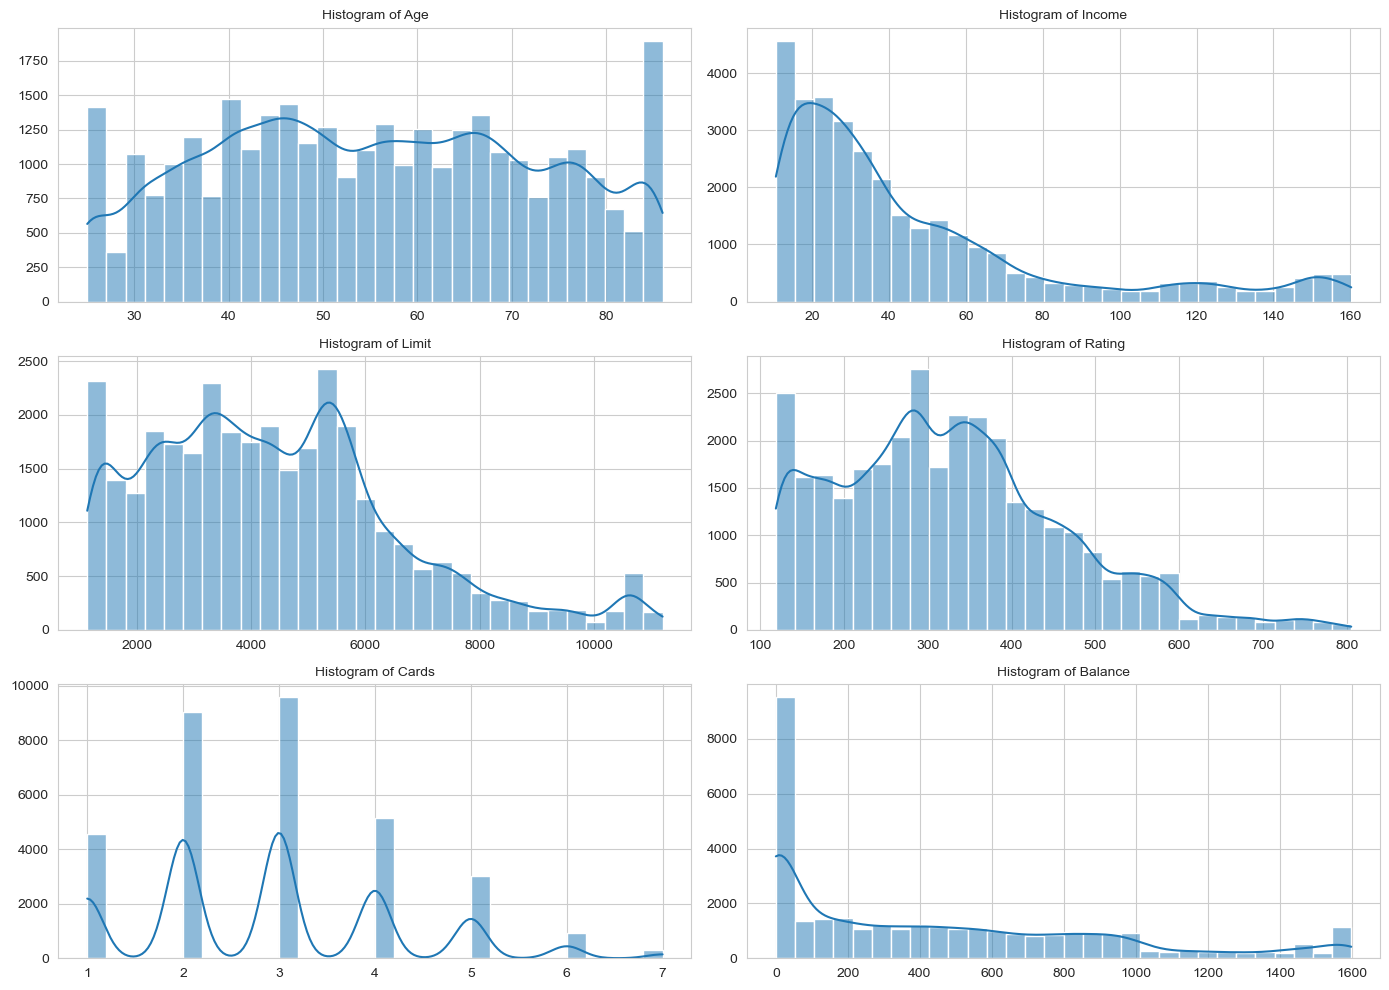

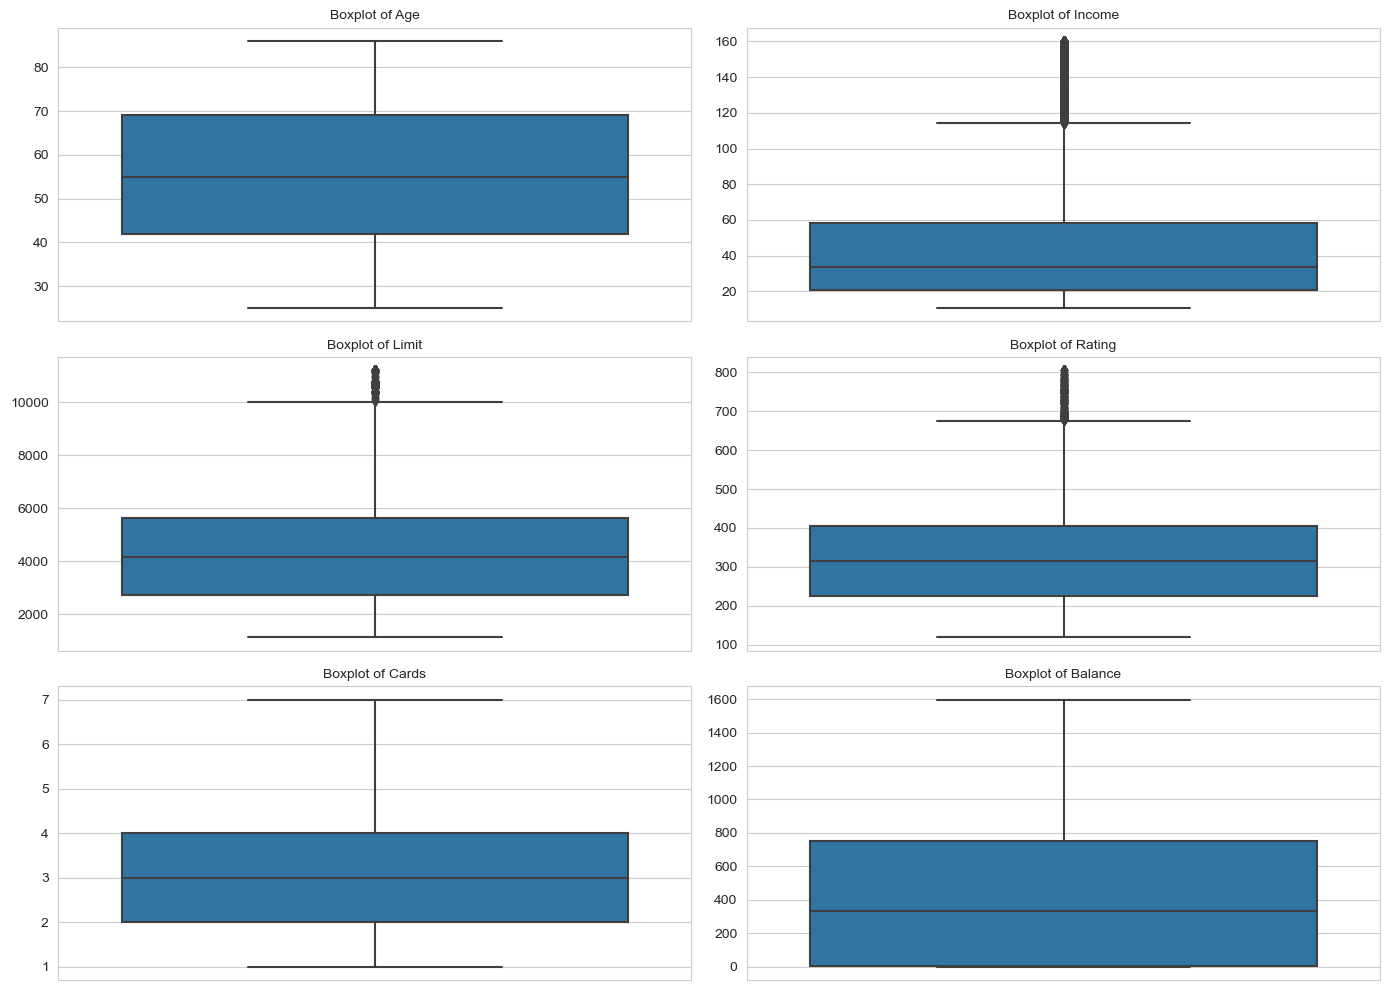

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

axes = axes.flatten()

num_columns = ['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance']

for i, col in enumerate(num_columns):
    sns.histplot(merged_df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(y=merged_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


Visualizing the Above Categorical Insights

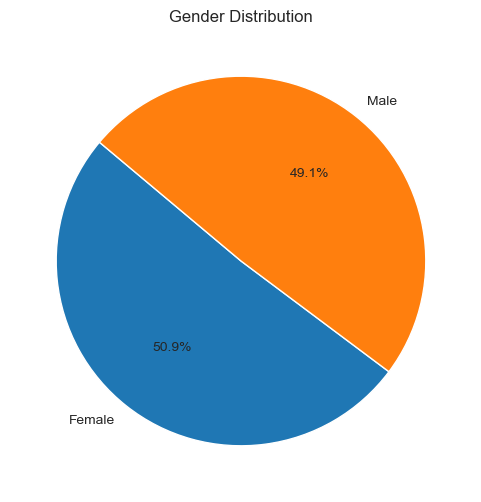

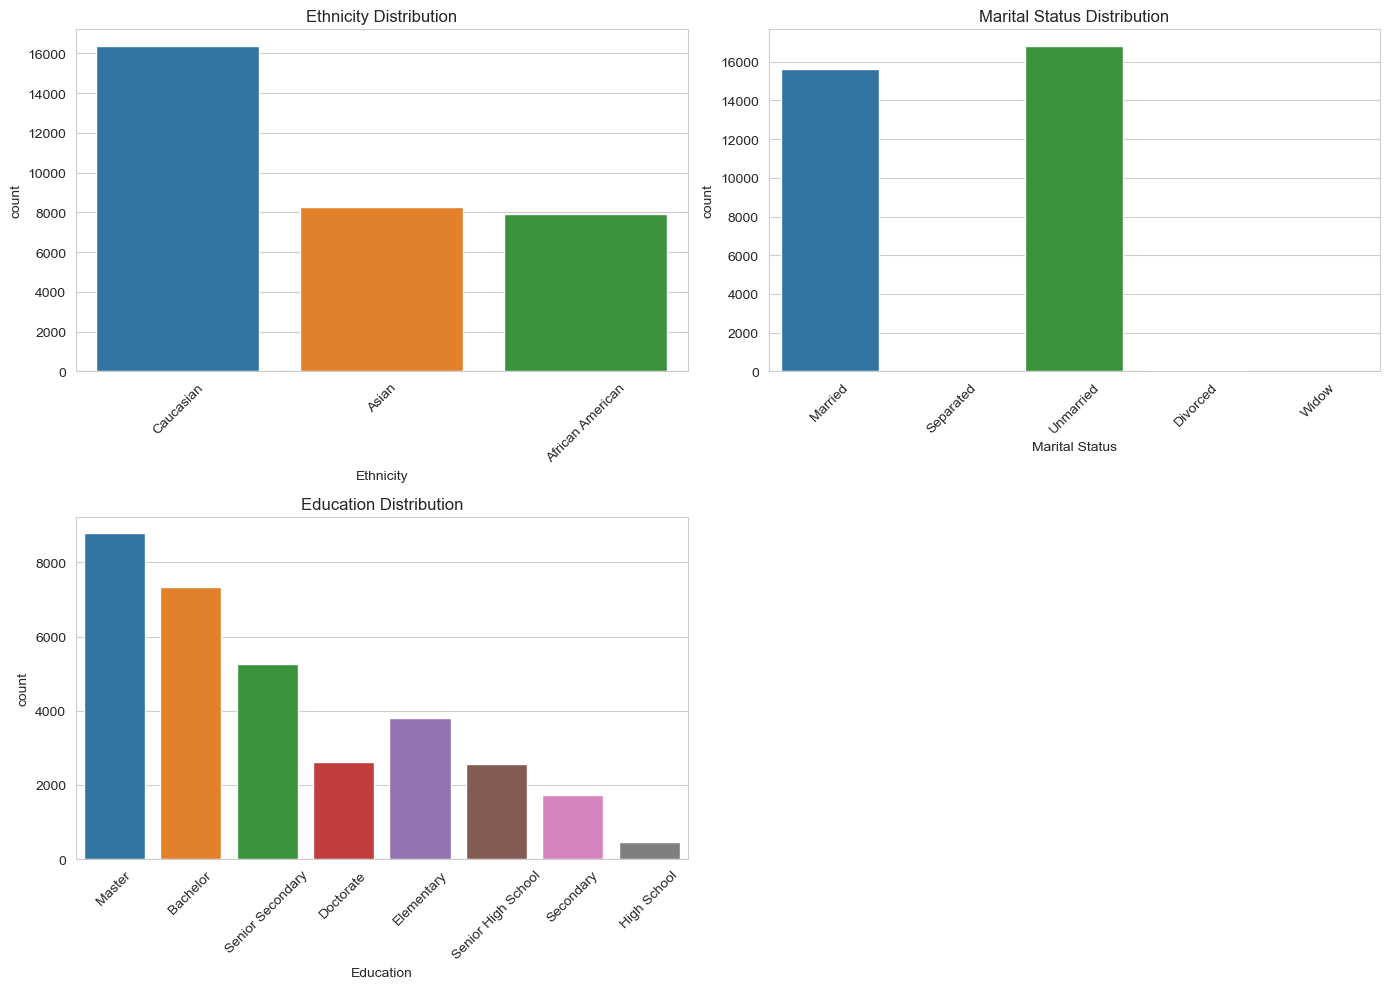

In [18]:
plt.figure(figsize=(6,6))
plt.pie(merged_df['Gender'].value_counts(), labels=merged_df['Gender'].value_counts().index, 
        autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

fig.delaxes(axes[1][1])

sns.countplot(x='Ethnicity', data=merged_df, ax=axes[0][0])
axes[0][0].set_title('Ethnicity Distribution')
axes[0][0].tick_params(axis='x', rotation=45)

sns.countplot(x='Marital Status', data=merged_df, ax=axes[0][1])
axes[0][1].set_title('Marital Status Distribution')
axes[0][1].tick_params(axis='x', rotation=45)

sns.countplot(x='Education', data=merged_df, ax=axes[1][0])
axes[1][0].set_title('Education Distribution')
axes[1][0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The histograms and boxplots provide the following insights:

Histograms
Age: The distribution appears to be fairly uniform, with a slight decrease in frequency for higher ages.
Income: Skewed to the right, indicating that a large number of individuals have lower incomes, with fewer individuals having higher incomes.
Limit and Rating: These are also right-skewed, similar to the income distribution, suggesting that higher credit limits and ratings are less common.
Cards: The distribution is multi-modal, indicating that there are common specific numbers of cards that individuals tend to have, with 2-4 cards being most common.
Balance: This is right-skewed, with a large number of individuals having low balances and a few having very high balances.
Boxplots
Age has no significant outliers, which aligns with the histogram showing a more uniform distribution.
Income, Limit, Rating, and Balance have several outliers on the higher end, indicating that there are individuals with significantly higher income, credit limits, credit ratings, and balances than the general population.
Cards shows a few outliers, with some individuals having more than 6 cards, which is rare in this dataset.

Pie Chart - Gender Distribution
The pie chart shows that the dataset contains a nearly equal distribution of genders, with females slightly more than males.
Bar Plots - Categorical Variables
Ethnicity: The majority of individuals are Caucasian, followed by African American and Asian.
Marital Status: 'Unmarried' is the most common status, with the other categories distributed among 'Married', 'Divorced', 'Widowed', and 'Separated'.
Education: The education levels are varied, with 'Master' being the most common, followed by other levels such as 'Doctorate', 'Bachelor', and 'Senior Secondary'.

# Identifying Outliers and Patterns in the Data
    We've already visually identified some outliers in the boxplots. We will now calculate the z-scores for the numerical variables to quantitatively identify outliers (typically, a z-score beyond ±3 is considered an outlier).

In [19]:
from scipy.stats import zscore

z_scores = merged_df[num_columns].apply(zscore)

threshold = 3

outliers = (z_scores.abs() > threshold)

outliers_count = outliers.sum().sort_values(ascending=False)

outliers_count

Income     382
Cards      298
Rating     278
Limit      157
Age          0
Balance      0
dtype: int64

# Hypothesis Testing

    Hypothesis Test 1: We will test if there is a significant difference in credit card balance between male and female customers.

    Null Hypothesis: There is no difference in the mean credit card balance between male and female customers.
    Alternative Hypothesis: There is a difference in the mean credit card balance between male and female customers.

    We'll use a t-test to compare the means of the two groups. For this test, we assume the variances are equal, and we'll use a significance level of 0.05.

    Hypothesis Test 2: We'll also test if there is a significant difference in credit limits between customers with a Master's degree and those with a Bachelor's degree.

    Null Hypothesis: There is no difference in the mean credit limit between customers with a Master's degree and those with a Bachelor's degree.
    Alternative Hypothesis: There is a difference in the mean credit limit between customers with a Master's degree and those with a Bachelor's degree.
    
    We will perform t-tests now.


In [20]:
from scipy.stats import ttest_ind

balance_male = merged_df[merged_df['Gender'] == 'Male']['Balance']
balance_female = merged_df[merged_df['Gender'] == 'Female']['Balance']

limit_masters = merged_df[merged_df['Education'] == 'Master']['Limit']
limit_bachelors = merged_df[merged_df['Education'] == 'Bachelor']['Limit']

t_stat_balance, p_val_balance = ttest_ind(balance_male, balance_female, equal_var=False)

t_stat_limit, p_val_limit = ttest_ind(limit_masters, limit_bachelors, equal_var=False)

(t_stat_balance, p_val_balance), (t_stat_limit, p_val_limit)

((0.9755527410432479, 0.3292934175483684),
 (-0.33410805432071433, 0.7383025173424949))

    Balance Between Genders
    T-Statistic: 0.976
    P-Value: 0.329
    
    Since the p-value (0.329) is greater than the significance level of 0.05, we do not reject the null hypothesis. This suggests that there is no statistically significant difference in credit card balance between male and female customers in our dataset.
    
    Credit Limit Between Education Levels (Master's vs Bachelor's)
    T-Statistic: -0.334
    P-Value: 0.738
    
    Similarly, since the p-value (0.738) is greater than 0.05, we do not reject the null hypothesis for this test either. This indicates that there is no statistically significant difference in the credit limit between customers with a Master's degree and those with a Bachelor's degree.

# Correlation Analysis
    We'll calculate the Pearson correlation coefficients for the numerical variables to see how they are related.

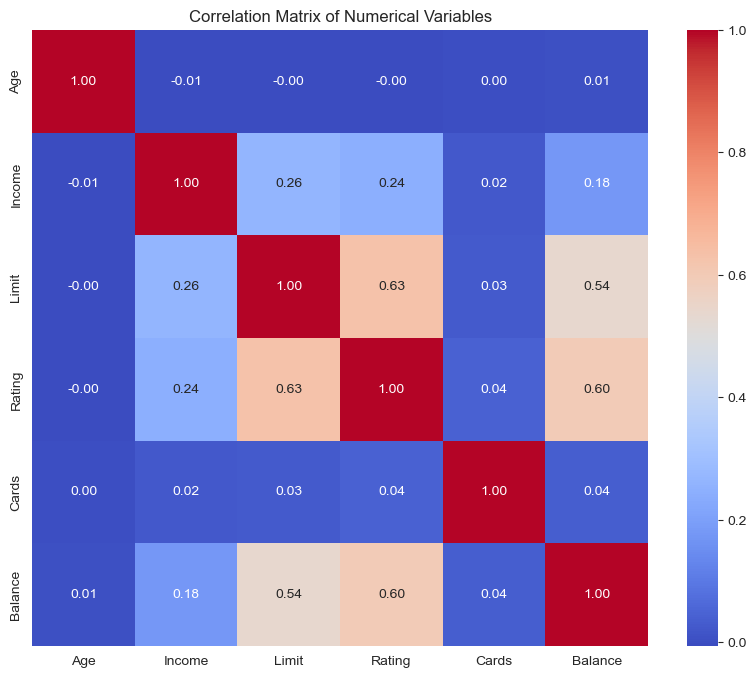

,Age,Income,Limit,Rating,Cards,Balance
Age,1.000000,-0.005523,-0.004586,-0.002299,0.001001,0.005424
Income,-0.005523,1.000000,0.261745,0.243290,0.024212,0.176111
Limit,-0.004586,0.261745,1.000000,0.629210,0.026519,0.539445
Rating,-0.002299,0.243290,0.629210,1.000000,0.043929,0.598677
Cards,0.001001,0.024212,0.026519,0.043929,1.000000,0.037445
Balance,0.005424,0.176111,0.539445,0.598677,0.037445,1.000000


In [21]:
correlation_matrix = merged_df[num_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

correlation_matrix


    The correlation matrix and heatmap provide the following insights:

    1)Age has almost no correlation with any other variable, indicating that the age of the individuals does not have a strong linear relationship with income, credit limit, rating, number of cards, or balance.
    2)Income has a moderate positive correlation with Limit (0.26) and Rating (0.24), suggesting that higher income individuals tend to have higher credit limits and better credit ratings.
    3)Limit and Rating have a strong positive correlation (0.63), which is expected since credit limits are often set based on credit ratings.
    4)Balance also shows a moderate to strong positive correlation with Limit (0.54) and Rating (0.60), indicating that individuals with higher credit limits and better ratings tend to carry higher balances.
    5)Cards has a very weak correlation with all other variables, suggesting that the number of cards is not strongly related to income, credit limit, rating, or balance.

# chi-square test
Testing  for independence between categorical variables such as Gender and Marital Status, or Education and Ethnicity.

To perform a chi-square test, we will test the following hypothesis:

Chi-Square Test 1:

Null Hypothesis: There is no association between Gender and Marital Status (they are independent).
Alternative Hypothesis: There is an association between Gender and Marital Status (they are not independent).
    
Chi-Square Test 2:

Null Hypothesis: There is no association between Education and Ethnicity (they are independent).
Alternative Hypothesis:There is an association between Education and Ethnicity (they are not independent).
For both tests, we will use a significance level of 0.05. 

Let's perform these chi-square tests.

In [22]:
from scipy.stats import chi2_contingency

gender_marital_ct = pd.crosstab(merged_df['Gender'], merged_df['Marital Status'])

chi2_stat_gender_marital, p_val_gender_marital, dof_gender_marital, expected_gender_marital = chi2_contingency(gender_marital_ct)

education_ethnicity_ct = pd.crosstab(merged_df['Education'], merged_df['Ethnicity'])

chi2_stat_education_ethnicity, p_val_education_ethnicity, dof_education_ethnicity, expected_education_ethnicity = chi2_contingency(education_ethnicity_ct)

chi_square_results = {
    "Gender and Marital Status": {"Chi2 Stat": chi2_stat_gender_marital, "P-Value": p_val_gender_marital},
    "Education and Ethnicity": {"Chi2 Stat": chi2_stat_education_ethnicity, "P-Value": p_val_education_ethnicity}
}

chi_square_results

{'Gender and Marital Status': {'Chi2 Stat': 1.5979648165698908,
  'P-Value': 0.8091578755335429},
 'Education and Ethnicity': {'Chi2 Stat': 84.85220453193782,
  'P-Value': 3.5271079373699403e-12}}

                                Chi-Square Test for Gender and Marital Status:
Chi-Square Statistic: 1.5979
P-Value: 0.8092

The p-value is much greater than the significance level of 0.05, which means we do not reject the null hypothesis. This suggests that there is no statistically significant association between Gender and Marital Status; they appear to be independent of each other in this dataset.

                                Chi-Square Test for Education and Ethnicity:
Chi-Square Statistic: 84.8522
P-Value: 3.53 * 10 pow(-12)
 
The p-value is extremely small, well below the significance level of 0.05, which means we reject the null hypothesis. This suggests that there is a statistically significant association between Education and Ethnicity; they are not independent of each other in this dataset.

                                        Average Number of Cards
                                        
We'll calculate the mean number of cards held by individuals in the dataset.

                             Relationship between Number of Cards and Credit Limits
                             
We'll use a scatter plot to visualize the relationship between the number of cards and credit limits. We'll also calculate the Pearson correlation coefficient to quantify the strength of the relationship.

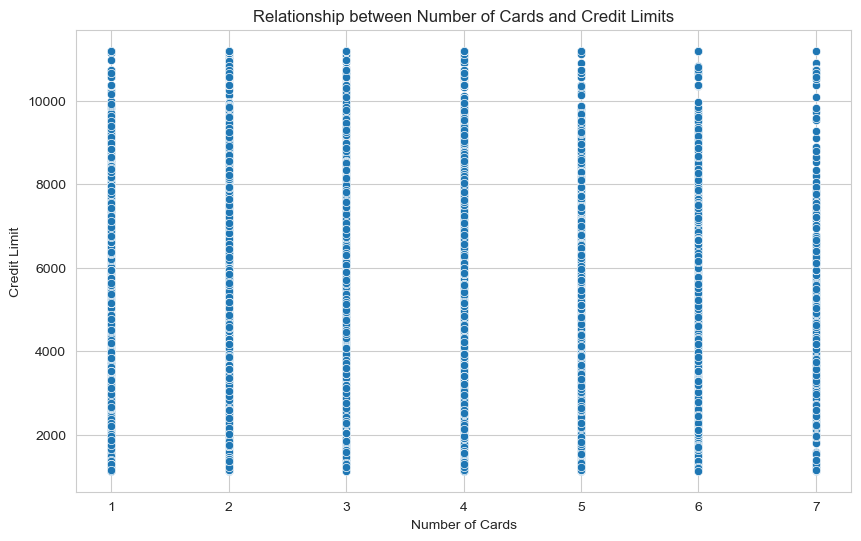

(2.906658063723231, 0.026519381216767977)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

average_cards = merged_df['Cards'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Cards', y='Limit')
plt.title('Relationship between Number of Cards and Credit Limits')
plt.xlabel('Number of Cards')
plt.ylabel('Credit Limit')
plt.show()

cards_limit_correlation = merged_df['Cards'].corr(merged_df['Limit'])

average_cards, cards_limit_correlation

The average number of cards owned by individuals in the dataset is approximately 2.91.

The scatter plot indicates that there isn't a strong relationship between the number of cards and credit limits. This is confirmed by the Pearson correlation coefficient, which is approximately 0.027, suggesting a very weak positive correlation.

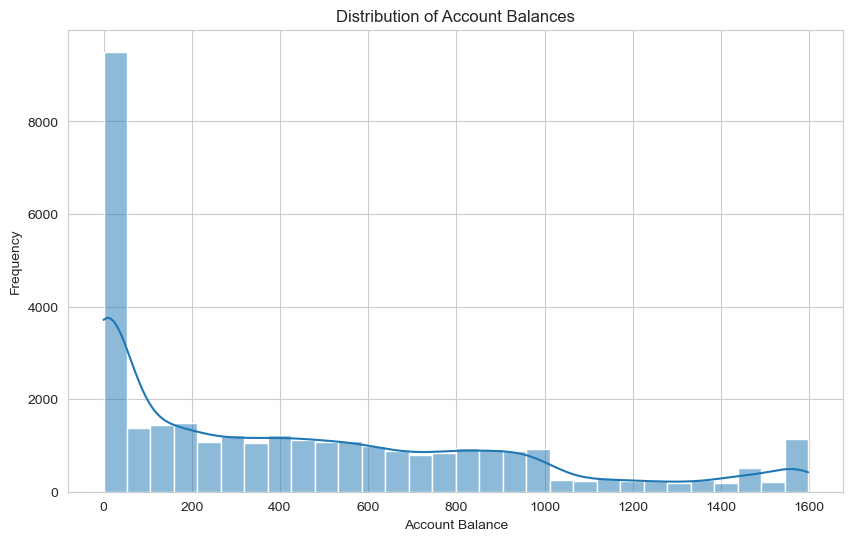

(1448.0,
 0.0,
 9        0003-MKNFEA
 30       0011-IGKFFX
 32        0013-EXCHZ
 33       0013-EXCHZA
 60       0014-BMAQUH
             ...     
 32369     9866-OCCKE
 32463     9933-QRGTX
 32490    9950-MTGYXH
 32504    9962-BFPDUH
 32521     9972-VAFJJ
 Name: CustomerID, Length: 1804, dtype: object,
 7        0002-ORFBOZ
 16        0004-TLHLJ
 17       0004-TLHLJA
 21       0004-TLHLJW
 23       0004-TLHLJZ
             ...     
 32527     9975-SKRNR
 32529     9978-HYCIN
 32535     9986-BONCE
 32537     9987-LUTYD
 32545     9995-HOTOH
 Name: CustomerID, Length: 7810, dtype: object)

In [24]:
# Histogram to evaluate the distribution of account balances
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Balance'], kde=True, bins=30)
plt.title('Distribution of Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

high_balance_threshold = merged_df['Balance'].quantile(0.95)
low_balance_threshold = merged_df['Balance'].quantile(0.05)

individuals_high_balance = merged_df[merged_df['Balance'] >= high_balance_threshold]
individuals_low_balance = merged_df[merged_df['Balance'] <= low_balance_threshold]

high_balance_threshold, low_balance_threshold, individuals_high_balance['CustomerID'], individuals_low_balance['CustomerID']

The distribution of account balances is right-skewed, indicating that most customers have lower balances with fewer having very high balances.

The threshold for high balances, representing the top 5% of the dataset, is at 1,448. This means that customers with a balance at or above this amount are in the top 5% of all balances. Conversely, the low balance threshold is at 0, representing the bottom 5%. This could mean that a significant number of customers have a zero or near-zero balance.

There are 1,804 individuals with high balances (above the 95th percentile) and 7,810 individuals with low balances (at or below the 5th percentile).

# Summary
    In our exploratory data analysis of a financial dataset merging customer demographics with card details, we uncovered that the average customer is around 55 years old with an income skewed towards the lower end, holding approximately 2.91 credit cards. The credit limits and ratings exhibit a right-skewed distribution, suggesting that higher credit limits and ratings are less prevalent. A nearly even gender distribution and a predominance of Caucasian ethnicity were observed. Statistically, there appears to be no significant difference in credit card balances between genders or credit limits across different education levels. The dataset exhibits right-skewed balance distributions, with a few customers holding very high balances. Outliers were predominantly on the upper end for income, limit, and balance, pointing to a subset of customers with significantly higher financial metrics. Correlation analysis revealed a weak relationship between the number of cards and credit limits, while chi-square tests indicated no association between gender and marital status, yet a significant association between education and ethnicity.